<a href="https://colab.research.google.com/github/TienLungSun/PyTorch-Colab/blob/main/999%20Image_classifier_1_epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program assumes that you have 2 classes of image folders, say 0, 1 at your Google drive

Load two classes of images from Google drive. Randomly split 80% of them into training set and 20% as test image set.

Load pre-trained VGG19 from Torchvision

Fix the CNN layers of VGG19 (features)

Use test images to train the MLP layers of VGG19 (classifier)

Visualize the loss and accuracy plot

Test the trained model and examine the confusion matrix 

In [ ]:
#Be sure you use GPU mode, otherwise it will take forever to train CNN
import torch
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


In [ ]:
#Load ImageNet pre-trained VGG19
import torchvision
model = torchvision.models.vgg19(pretrained=True)
print(model)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), pad

Use the pre-trained weights from VGG19 to build our own classifier


Let input image size = (224, 224, 3), Output has 2 classes: Angry, Happy, Sad, Surprised, Unknown

In [ ]:
import torch.nn as nn
# fix the weight of convolution layers
model.features.eval()

# modify classifier
model.classifier = torch.nn.Sequential(
  nn.Linear(25088, 4096),
  nn.ReLU(inplace=True),
  nn.Dropout(p=0.5, inplace=False),
  nn.Linear(4096, 4096),
  nn.ReLU(inplace=True),
  nn.Dropout(p=0.5, inplace=False),
  torch.nn.Linear(4096, 2))

In [ ]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
from torchsummary import summary
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Connect to Google drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
from torchvision import transforms
transformer = transforms.Compose([
     transforms.Resize((224, 224)),       
     transforms.ToTensor(),                     
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5] )])

In [ ]:
from torchvision import datasets
dataset = datasets.ImageFolder(root = "/content/gdrive/MyDrive/vgg19_class/", transform = transformer)

In [ ]:
classes = dataset.classes
classes_index = dataset.class_to_idx
datacount = len(dataset.samples)
print(classes)
print(classes_index)
print(datacount)

['Alolan Sandslash', 'Articuno']
{'Alolan Sandslash': 0, 'Articuno': 1}
86


In [ ]:
train_set, test_set = torch.utils.data.random_split(dataset, [int(datacount*0.8), datacount-int(datacount*0.8)])
import torch.utils.data as Data
trainloader = Data.DataLoader(
    dataset=train_set,  
    batch_size=5,      
    shuffle=True,       
    num_workers=0,    # subprocesses for loading data
)
testloader = Data.DataLoader(
    dataset=test_set,  
    batch_size=1,      
    shuffle=False,       
    num_workers=0,    # subprocesses for loading data
)

Training loop

In [ ]:
import os
lossLst = []
accuracyLst = []
parameter_name = os.path.join('vgg19.pth')
for epoch in range(1, 2):
  correct = 0
  loss_sum = 0.0
  print("\nepoch = ", epoch, end = ", ")
  print("batch: ", end="")
  for step, (batch_x, batchY_hat) in enumerate(trainloader):
    if(step%5==0):
      print(step, end = ", ")
    tensorY = model(batch_x.to(device))
    loss = loss_func(tensorY, batchY_hat.to(device))
    loss_sum += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    tensorY = torch.softmax(tensorY, 1)
    MaxIdxOfEachRow = torch.max(tensorY, 1)[1]
    for i in range(batchY_hat.shape[0]):
      if (int(MaxIdxOfEachRow[i]) == int(batchY_hat[i])):
        correct += 1
  lossLst.append(float(loss_sum))
  accuracy = correct/len(train_set)
  accuracyLst.append(accuracy)
  torch.save(model.state_dict(), parameter_name)


epoch =  1, batch: 0, 5, 10, 

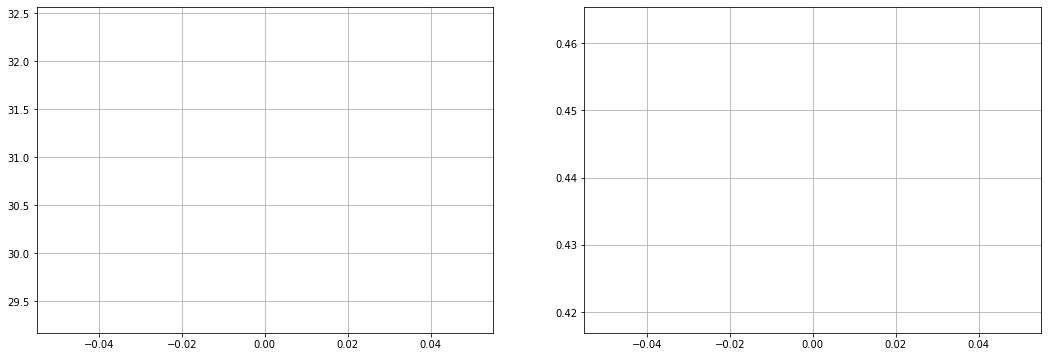

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18, 6))
fig.add_subplot(1, 2, 1) 
plt.plot(lossLst)
plt.grid()

fig.add_subplot(1, 2, 2) 
plt.plot(accuracyLst)
plt.grid()
plt.show()

Test

In [ ]:
parameter_name = os.path.join('vgg19.pth')
model.load_state_dict(torch.load(parameter_name))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

draw confusuion matrix

In [ ]:
classes = ('0', '1')
@torch.no_grad()
def Extract(lst):
  return [item[1] for item in lst]
def get_all_preds(model, testloader):
    all_preds = torch.tensor([])
    for batch in testloader:
        images, labels = batch
        preds = model(images.to(device)).cpu()
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()
target = Extract(test_set)
with torch.no_grad():
    test_preds = get_all_preds(model, testloader)
    
preds_correct = get_num_correct(test_preds, torch.tensor(target))
 
accuracy_final = preds_correct / len(test_set)
print('total correct:', preds_correct)
print('total sample:', len(test_set))
print('accuracy:', accuracy_final)

total correct: 9
total sample: 18
accuracy: 0.5


Confusion matrix, without normalization
[[0 9]
 [0 9]]


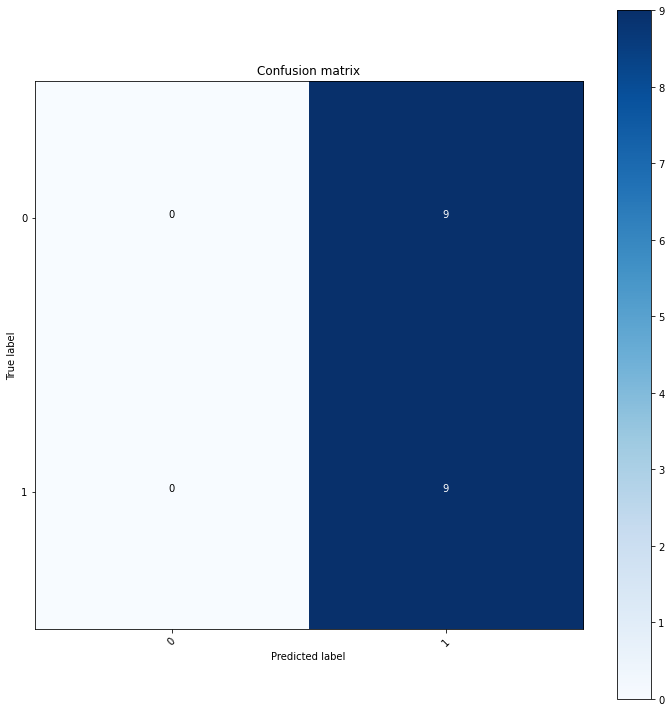

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
stacked = torch.stack(
    (
        torch.tensor(target)
        ,test_preds.argmax(dim=1)
    )
    ,dim=1
)
cmt = torch.zeros(2,2, dtype=torch.int64)
for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] + 1
cm = confusion_matrix(target, test_preds.argmax(dim=1))
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
 
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes)